<a href="https://colab.research.google.com/github/eitanfass/Tomato_quality/blob/main/GRVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing libraries

In [43]:
import skimage.io as io # io is an input output moduile, as part of skimage
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from skimage.util import img_as_float
import glob
from google.colab import drive
drive.mount('/content/drive')
import scipy.ndimage
import matplotlib.colors as colors
import matplotlib

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#creating functions

In [73]:

def GRVI(img_path,gauss=False,mean=False):
  '''functon gets img path and boolian 
  values to deermin the image 
  filtering before applying 
  GRVI index on the img in the path. returns: img,index (as float imgs)'''
  img=io.imread(img_path)#read img from path

  if gauss==True:
    img = scipy.ndimage.gaussian_filter(img, sigma=1.0)#apply gauss filter on image to blurr out noise
  if mean ==True:
    img = scipy.ndimage.uniform_filter(img, size=3)# apply mean filter on img to make eges sharper
  img = img_as_float(img)#format img to float_img
  return img,(img[:,:,1]-img[:,:,0])/(img[:,:,1]+img[:,:,0])# return img and indexed img



def show_index(img,index,index_name=''):# function that plots img and index, with colorbar, index_name will show in the title
  # define figure size: width 10 and height 15
  plt.figure(figsize=(10, 15))

  # subplot for the RGB
  ax1 = plt.subplot(121, title='Original RGB')
  im1 = ax1.imshow(img) 

  # subplot for the index
  ax2 = plt.subplot(122, title=f'{index_name} index, mean={np.nanmean(index):.3f} min={np.nanmin(index):.3f} max={np.nanmax(index):.3f}') # notice the position, and the title
  cmap=matplotlib.cm.get_cmap('Spectral_r',10)#set colormap to Spectral
  im2 = ax2.imshow(index,cmap=cmap)#show index in Spectral colormap
  im2.set_clim(vmax=index.max(), vmin=index.min())# set min max values of color to max and min values of index img
  
  # add colorbar only to the image on the right
  divider = make_axes_locatable(ax2)
  colorbar_ax = divider.append_axes("right", size="5%", pad=0.05)  
  plt.colorbar(im2, cax=colorbar_ax)


def create_mask_from_index(index,thresh=None):# function that creats a mask for an index img from a threshhold if provided
  if thresh==None:
    thresh=index.mean()#if no threshold is given it is set to index mean
  
  mask=index.copy()#copy index to mask
  mask[mask>thresh]=1# if pixel value is larger than threshold set value to 1 
  mask[mask<=thresh]=0  # if pixel value is smaller than threshold set value to 0
  return mask #returns a binery one layer mask


#code

<ipython-input-73-24cfcfd4b62c>:13: RuntimeWarning: invalid value encountered in true_divide
  return img,(img[:,:,1]-img[:,:,0])/(img[:,:,1]+img[:,:,0])# return img and indexed img


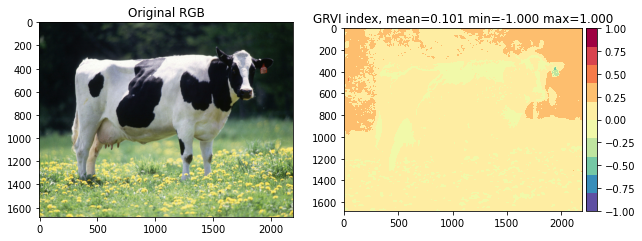

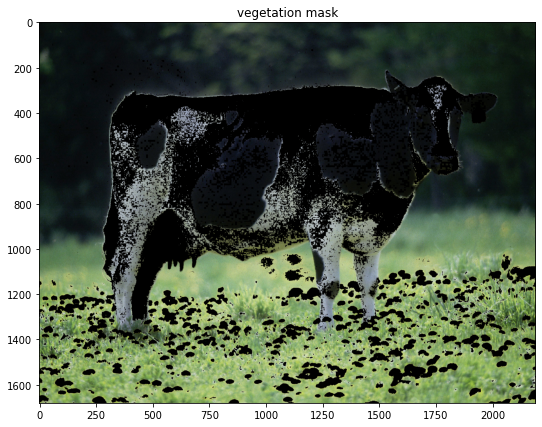

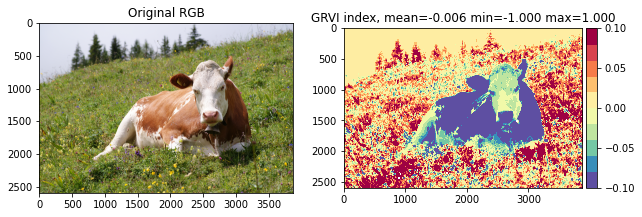

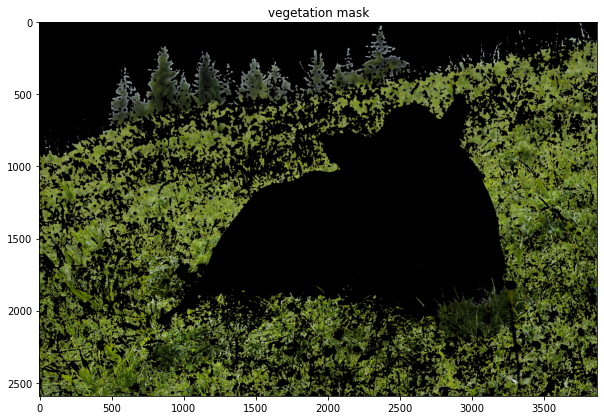

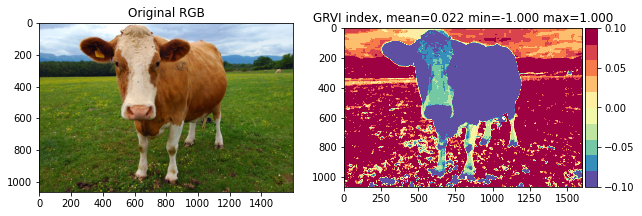

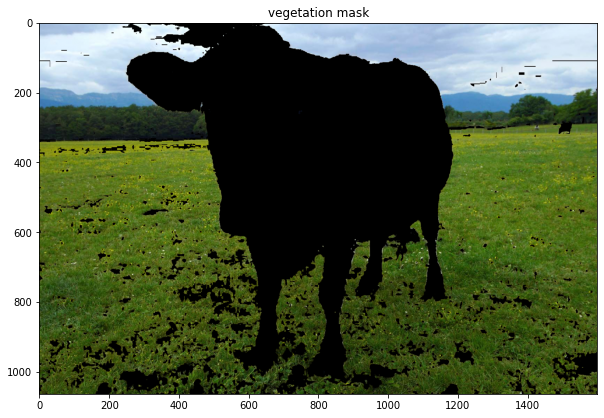

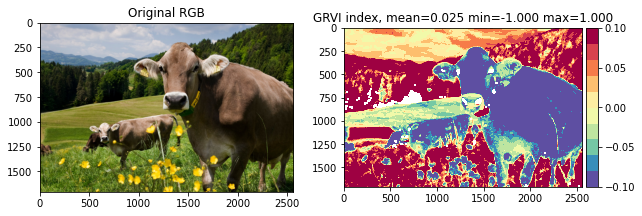

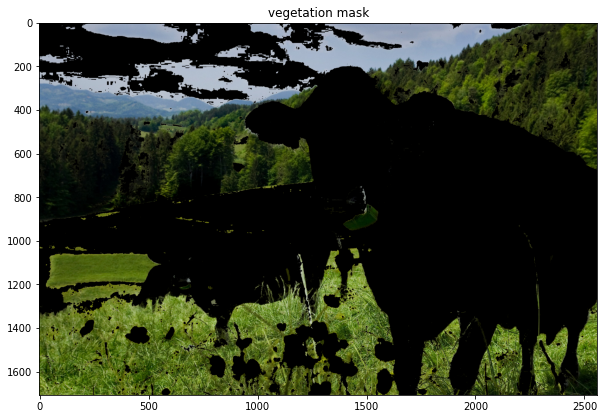

In [78]:
img_folder_path='/content/drive/MyDrive/saved_imgs/cows'#folder with imgs to run  
path_list = glob.glob(f'{img_folder_path}/*.*') #get a list of paths for every item in the folder
img_formats=['png','jpeg','jpg']#img formats accepted by the code
for path in path_list:
  if path.split('.')[-1] in img_formats:#check if the current path is an img in the right format
    img,index=GRVI(path)# call GRVI function
    show_index(img,index,index_name='GRVI')# call show_index function to present indexed imgs
    mask=create_mask_from_index(index,0.02)#creat mask with thresh of 0
    plt.figure(figsize=(10,7))# creat fig
    ax = plt.subplot(111, title='vegetation mask')#set title and axes
    mask_3d=img.copy()
    mask_3d[:,:,0],mask_3d[:,:,1],mask_3d[:,:,2]=mask,mask,mask #transform 1 leyer mask to 3 layer mask for rgb masked img 
    masked_image = np.where(mask_3d == 1, img, 0)#apply the 3 layer mask 
    ax.imshow(masked_image,cmap='gray')#show masked img
